In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

# 1 · Load cleaned data
product_df = pd.read_csv("../amazon-cleaned.csv")

# 2 · Select numeric features (extend as needed)
num_cols = ["actual_price", "discounted_price", "rating", "encode_review_raing"]
X_train = product_df[num_cols].copy()

X_train.dropna(inplace=True)


In [36]:
print(X_train.shape)
print(X_train.duplicated().sum())
X_train.drop_duplicates(inplace=True)
print(X_train.shape)

(11446, 4)
10190
(1256, 4)


In [37]:
# 3 · Scale (important for K‑Means distance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

/var/folders/sf/zs026qqn0c70ggnkg8smzsqh0000gn/T/ipykernel_18917/793360358.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_components[:,0], principal_components[:,1], cmap='viridis', s=10)
/var/folders/sf/zs026qqn0c70ggnkg8smzsqh0000gn/T/ipykernel_18917/793360358.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = plt.scatter(principal_components[:,0], principal_components[:,2], cmap='viridis', s=10)
/opt/anaconda3/envs/mlds/lib/python3.12/site-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/var/folders/sf/zs026qqn0c70ggnkg8smzsqh0000gn/T/ipykernel_18917/793360358.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_compo

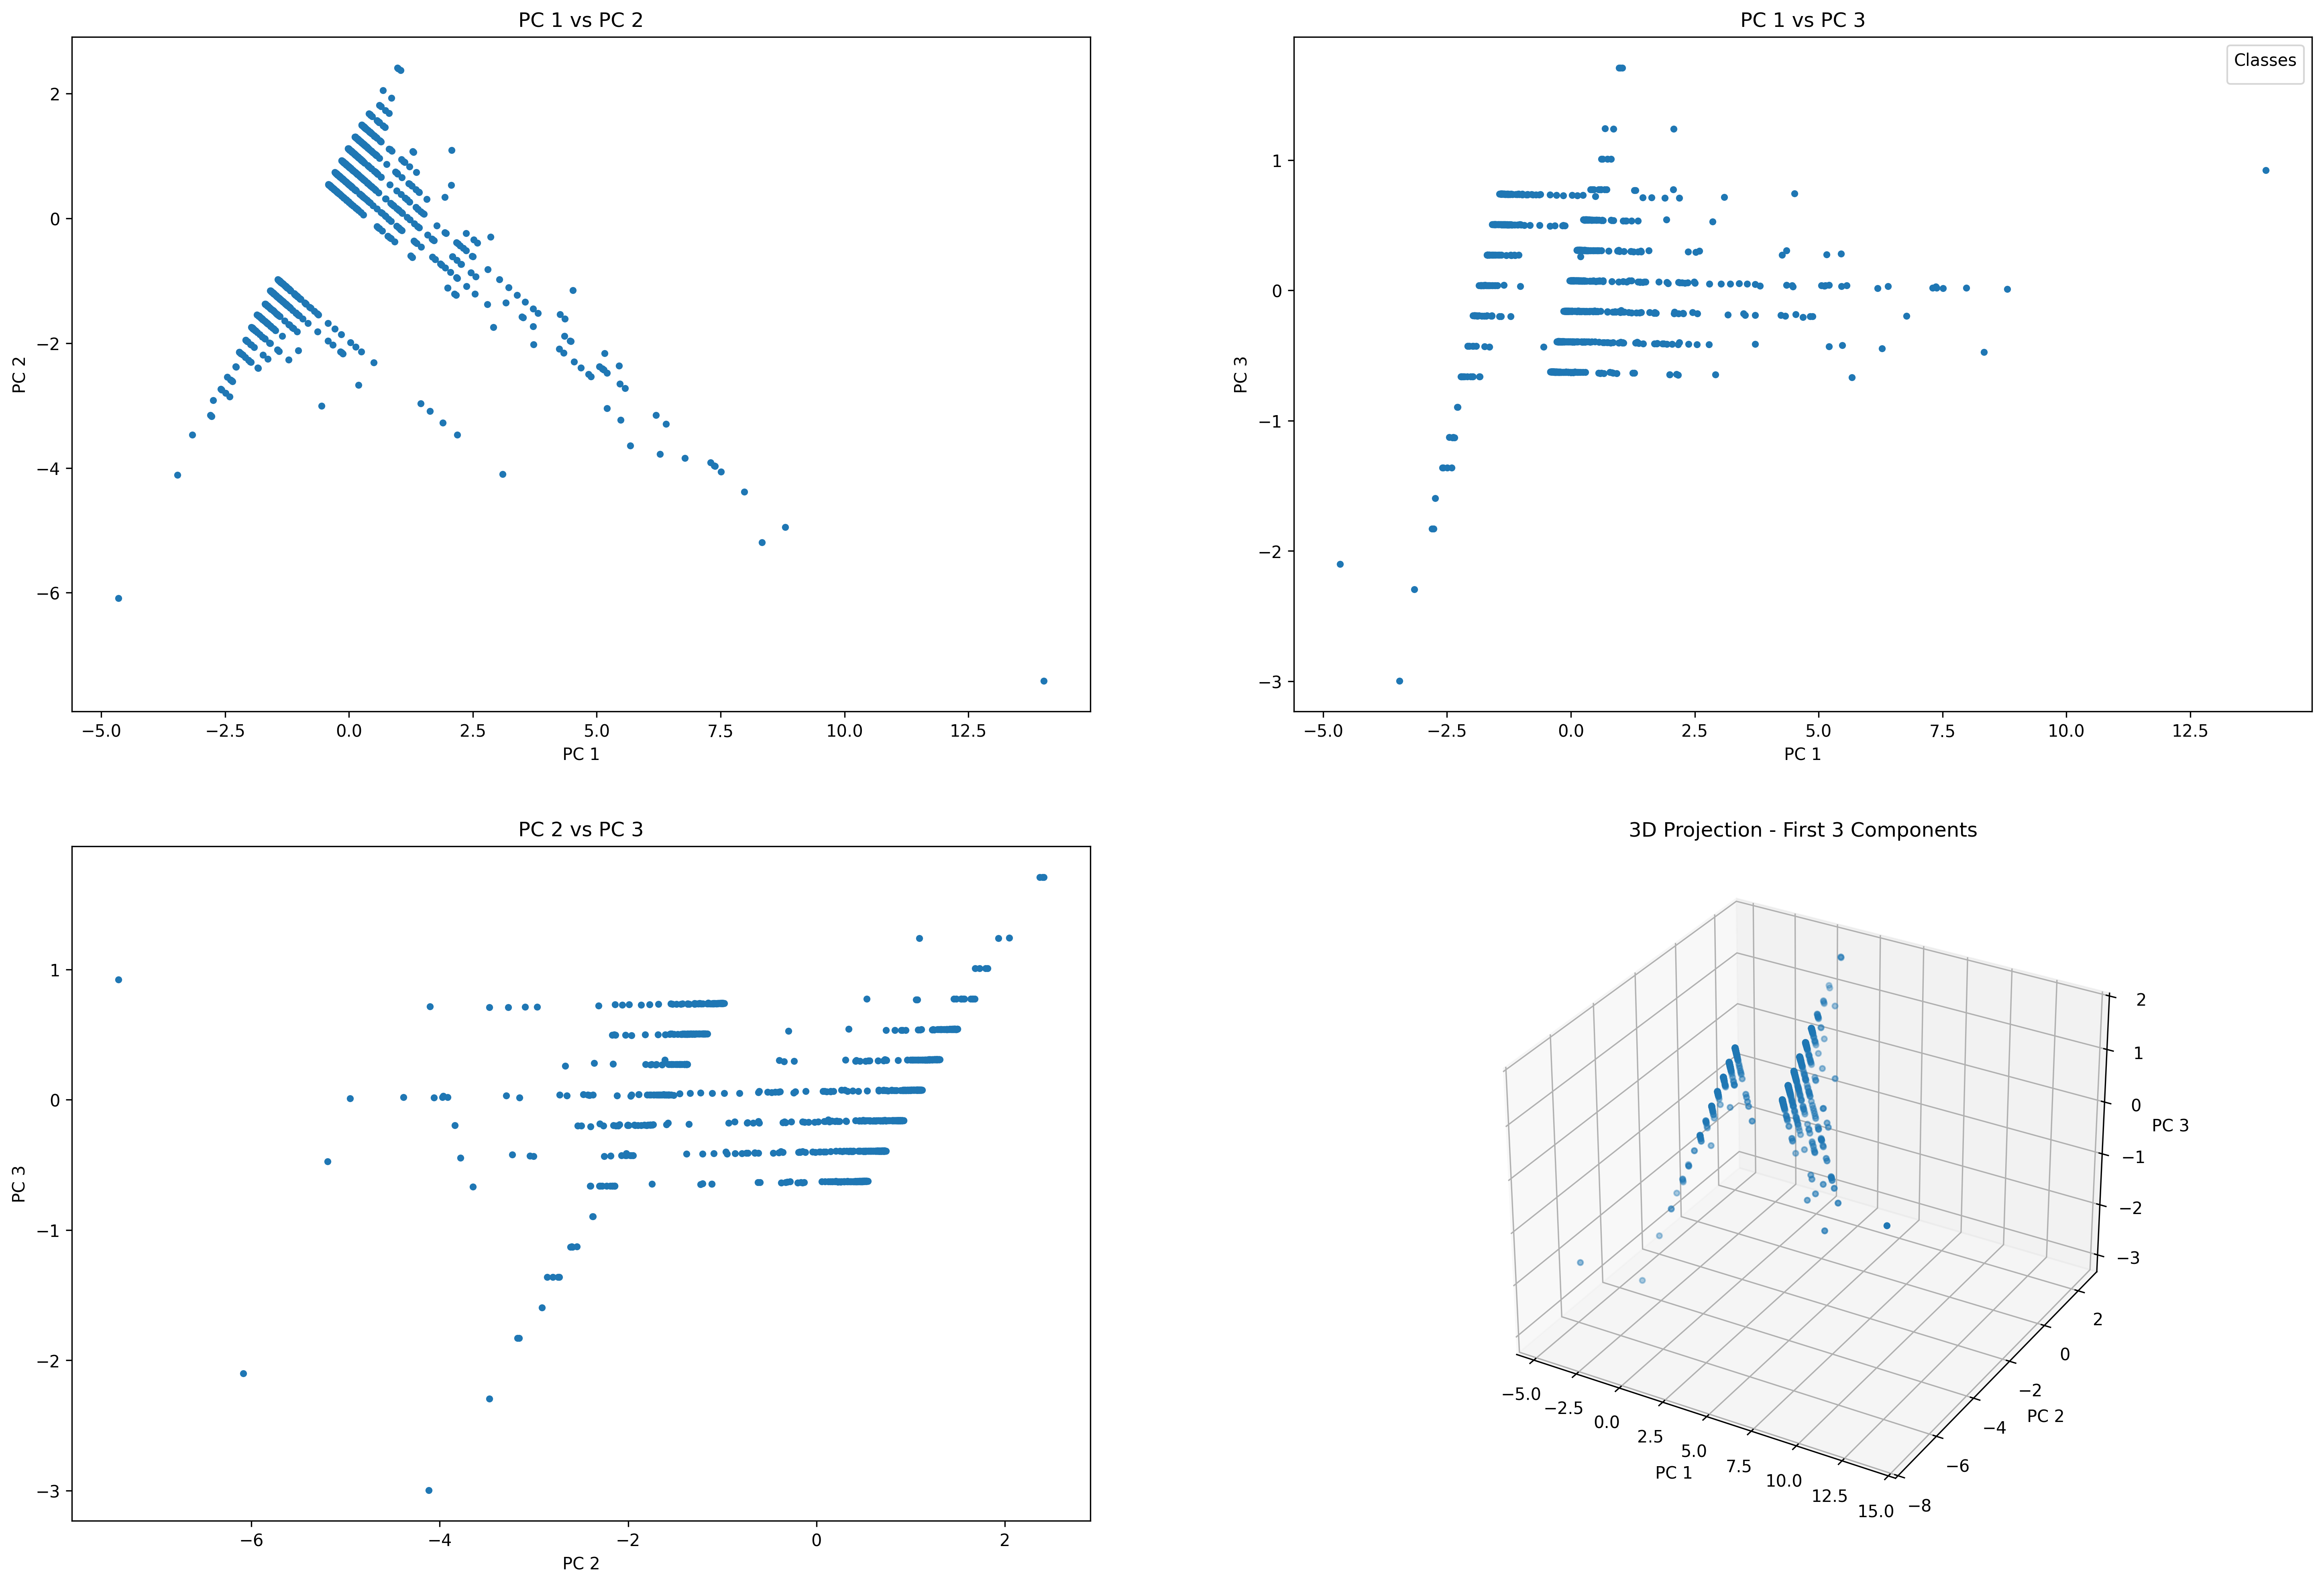

In [39]:
principal_components = pca.transform(X_train_scaled)

plt.figure(figsize=(24,16), dpi = 300)
# PC1 vs PC2
plt.subplot(2,2,1)
plt.scatter(principal_components[:,0], principal_components[:,1], cmap='viridis', s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 1 vs PC 2')

# PC1 vs PC3
plt.subplot(2,2,2)
scatter2 = plt.scatter(principal_components[:,0], principal_components[:,2], cmap='viridis', s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.title('PC 1 vs PC 3')
plt.legend(*scatter2.legend_elements(), title="Classes")

# PC2 vs PC3
plt.subplot(2,2,3)
plt.scatter(principal_components[:,1], principal_components[:,2], cmap='viridis', s=10)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title('PC 2 vs PC 3')

ax = plt.subplot(2, 2, 4, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], cmap='viridis', s=10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D Projection - First 3 Components')

plt.show()

plt.show()

# 4 · Fit K‑Means (k = 6 here, adjust via elbow)
K = 6
kmeans = KMeans(n_clusters=K, n_init="auto", random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [40]:
x_train_pca = pca.transform(X_train_scaled)

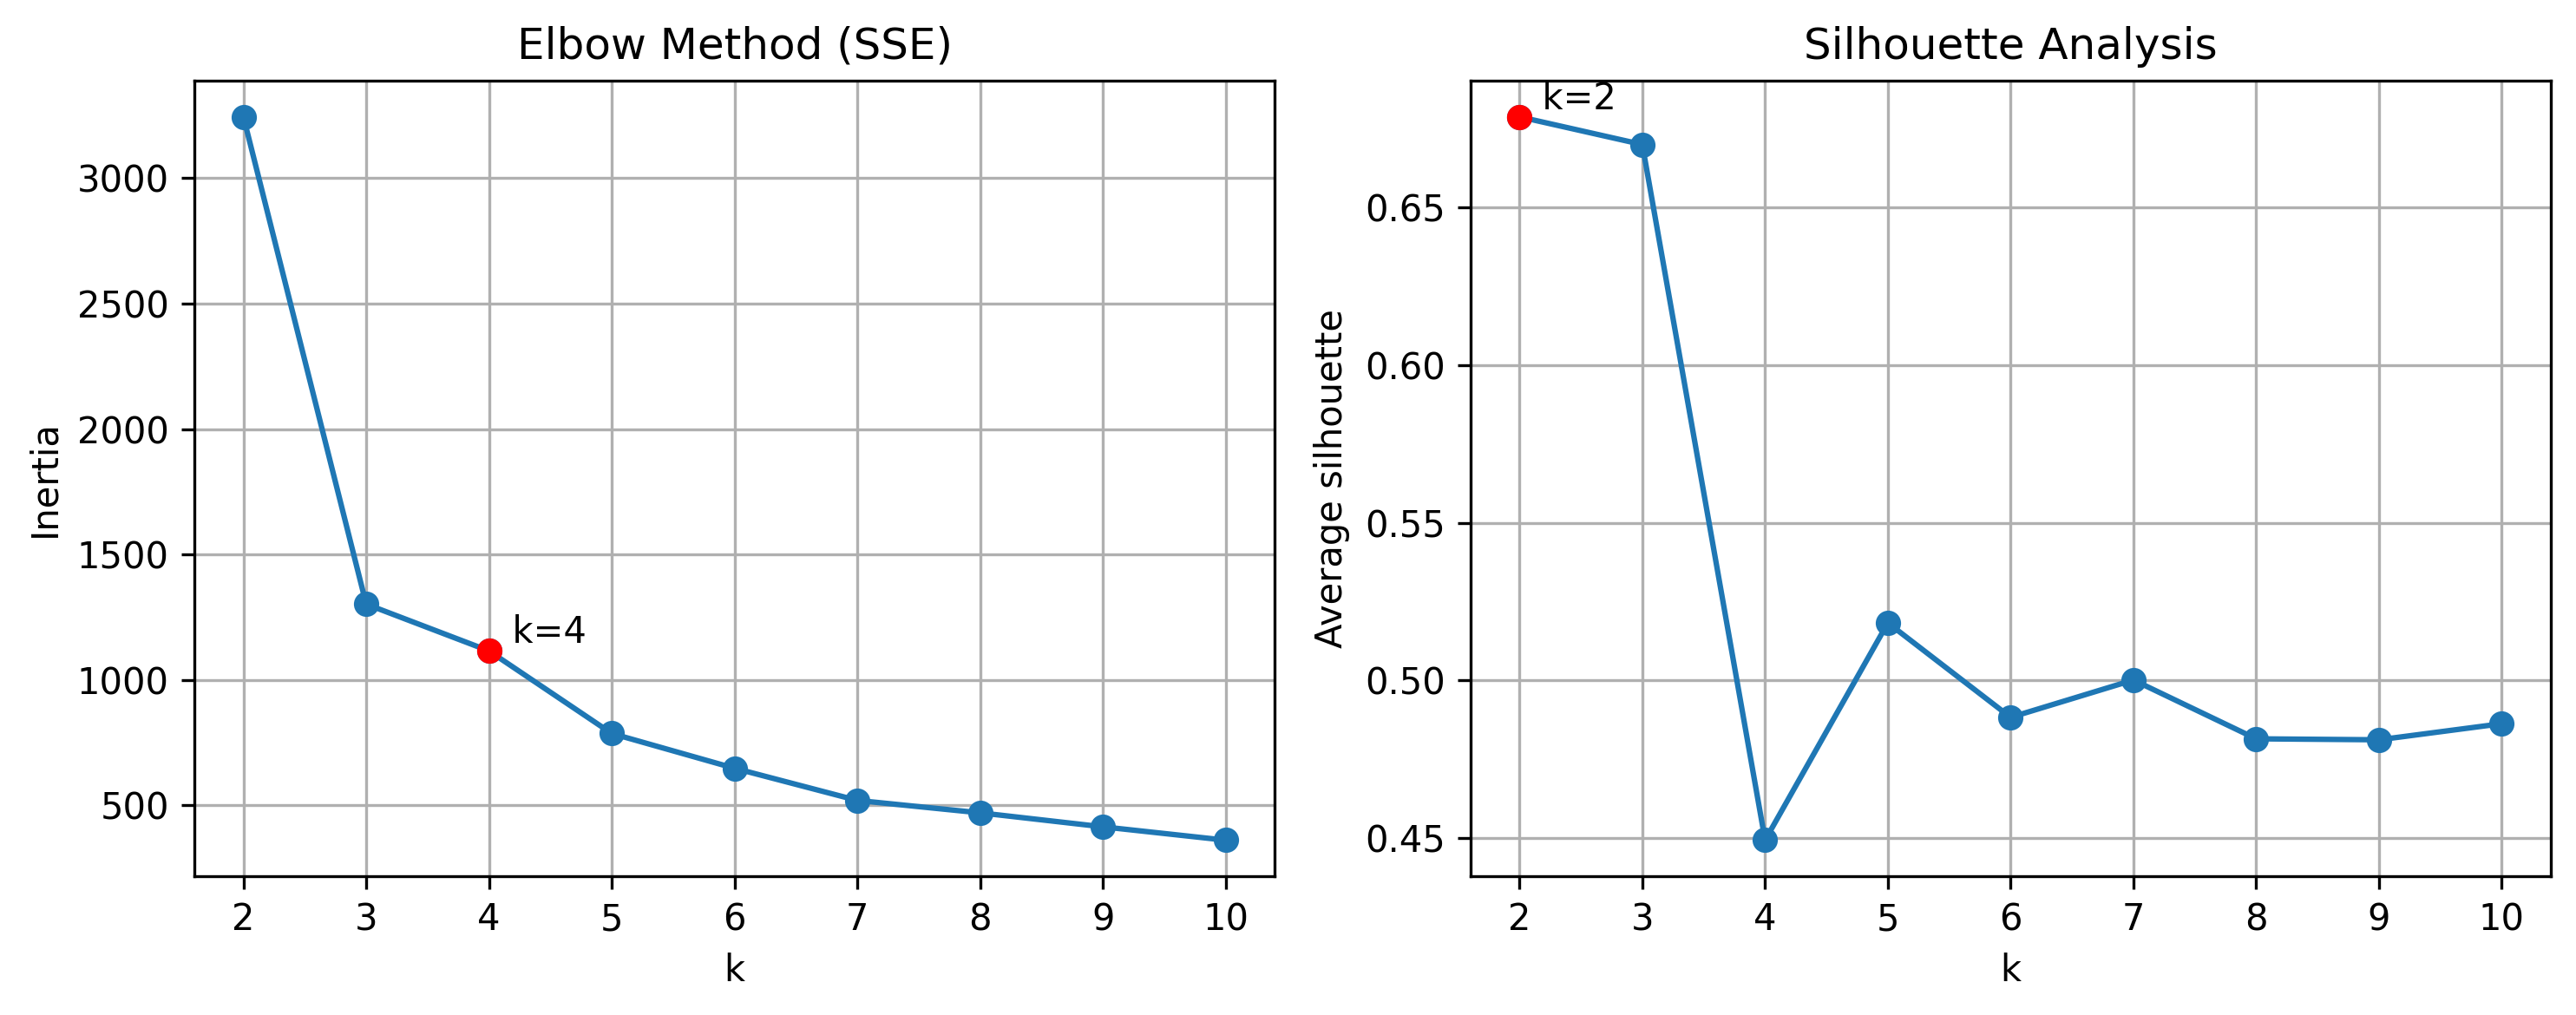

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- CONFIG ---
k_range = range(2, 11)          # try k = 2 … 10
sample_size = 1256             # subsample for silhouette to save time
random_state = 42

# --- METRIC LOOPS ---
inertias, sil_scores = [], []

for k in k_range:
    km = KMeans(n_clusters=k, n_init="auto", random_state=random_state)
    labels = km.fit_predict(x_train_pca)
    inertias.append(km.inertia_)
    
    # subsample for silhouette if dataset is huge
    idx = np.random.choice(x_train_pca.shape[0],
                           min(sample_size, x_train_pca.shape[0]),
                           replace=False)
    sil_scores.append(silhouette_score(x_train_pca[idx], labels[idx]))

# --- PLOT ---
plt.figure(figsize=(10, 4), dpi=300)

# Elbow
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker="o")
best_k_elbow = k_range[np.argmax(np.diff(inertias, 2) < 0) + 1]  # crude elbow hint
plt.scatter(best_k_elbow, inertias[best_k_elbow-2], color="red", zorder=3)
plt.text(best_k_elbow, inertias[best_k_elbow-2],
         f"  k={best_k_elbow}", va="bottom", ha="left")
plt.title("Elbow Method (SSE)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)

# Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker="o")
best_k_sil = k_range[int(np.argmax(sil_scores))]
plt.scatter(best_k_sil, max(sil_scores), color="red", zorder=3)
plt.text(best_k_sil, max(sil_scores),
         f"  k={best_k_sil}", va="bottom", ha="left")
plt.title("Silhouette Analysis")
plt.xlabel("k")
plt.ylabel("Average silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
final_km = KMeans(n_clusters=3, random_state=random_state)
y_labels = final_km.fit_predict(X_train_scaled)

In [43]:
y_labels

array([1, 1, 2, ..., 2, 1, 1], dtype=int32)

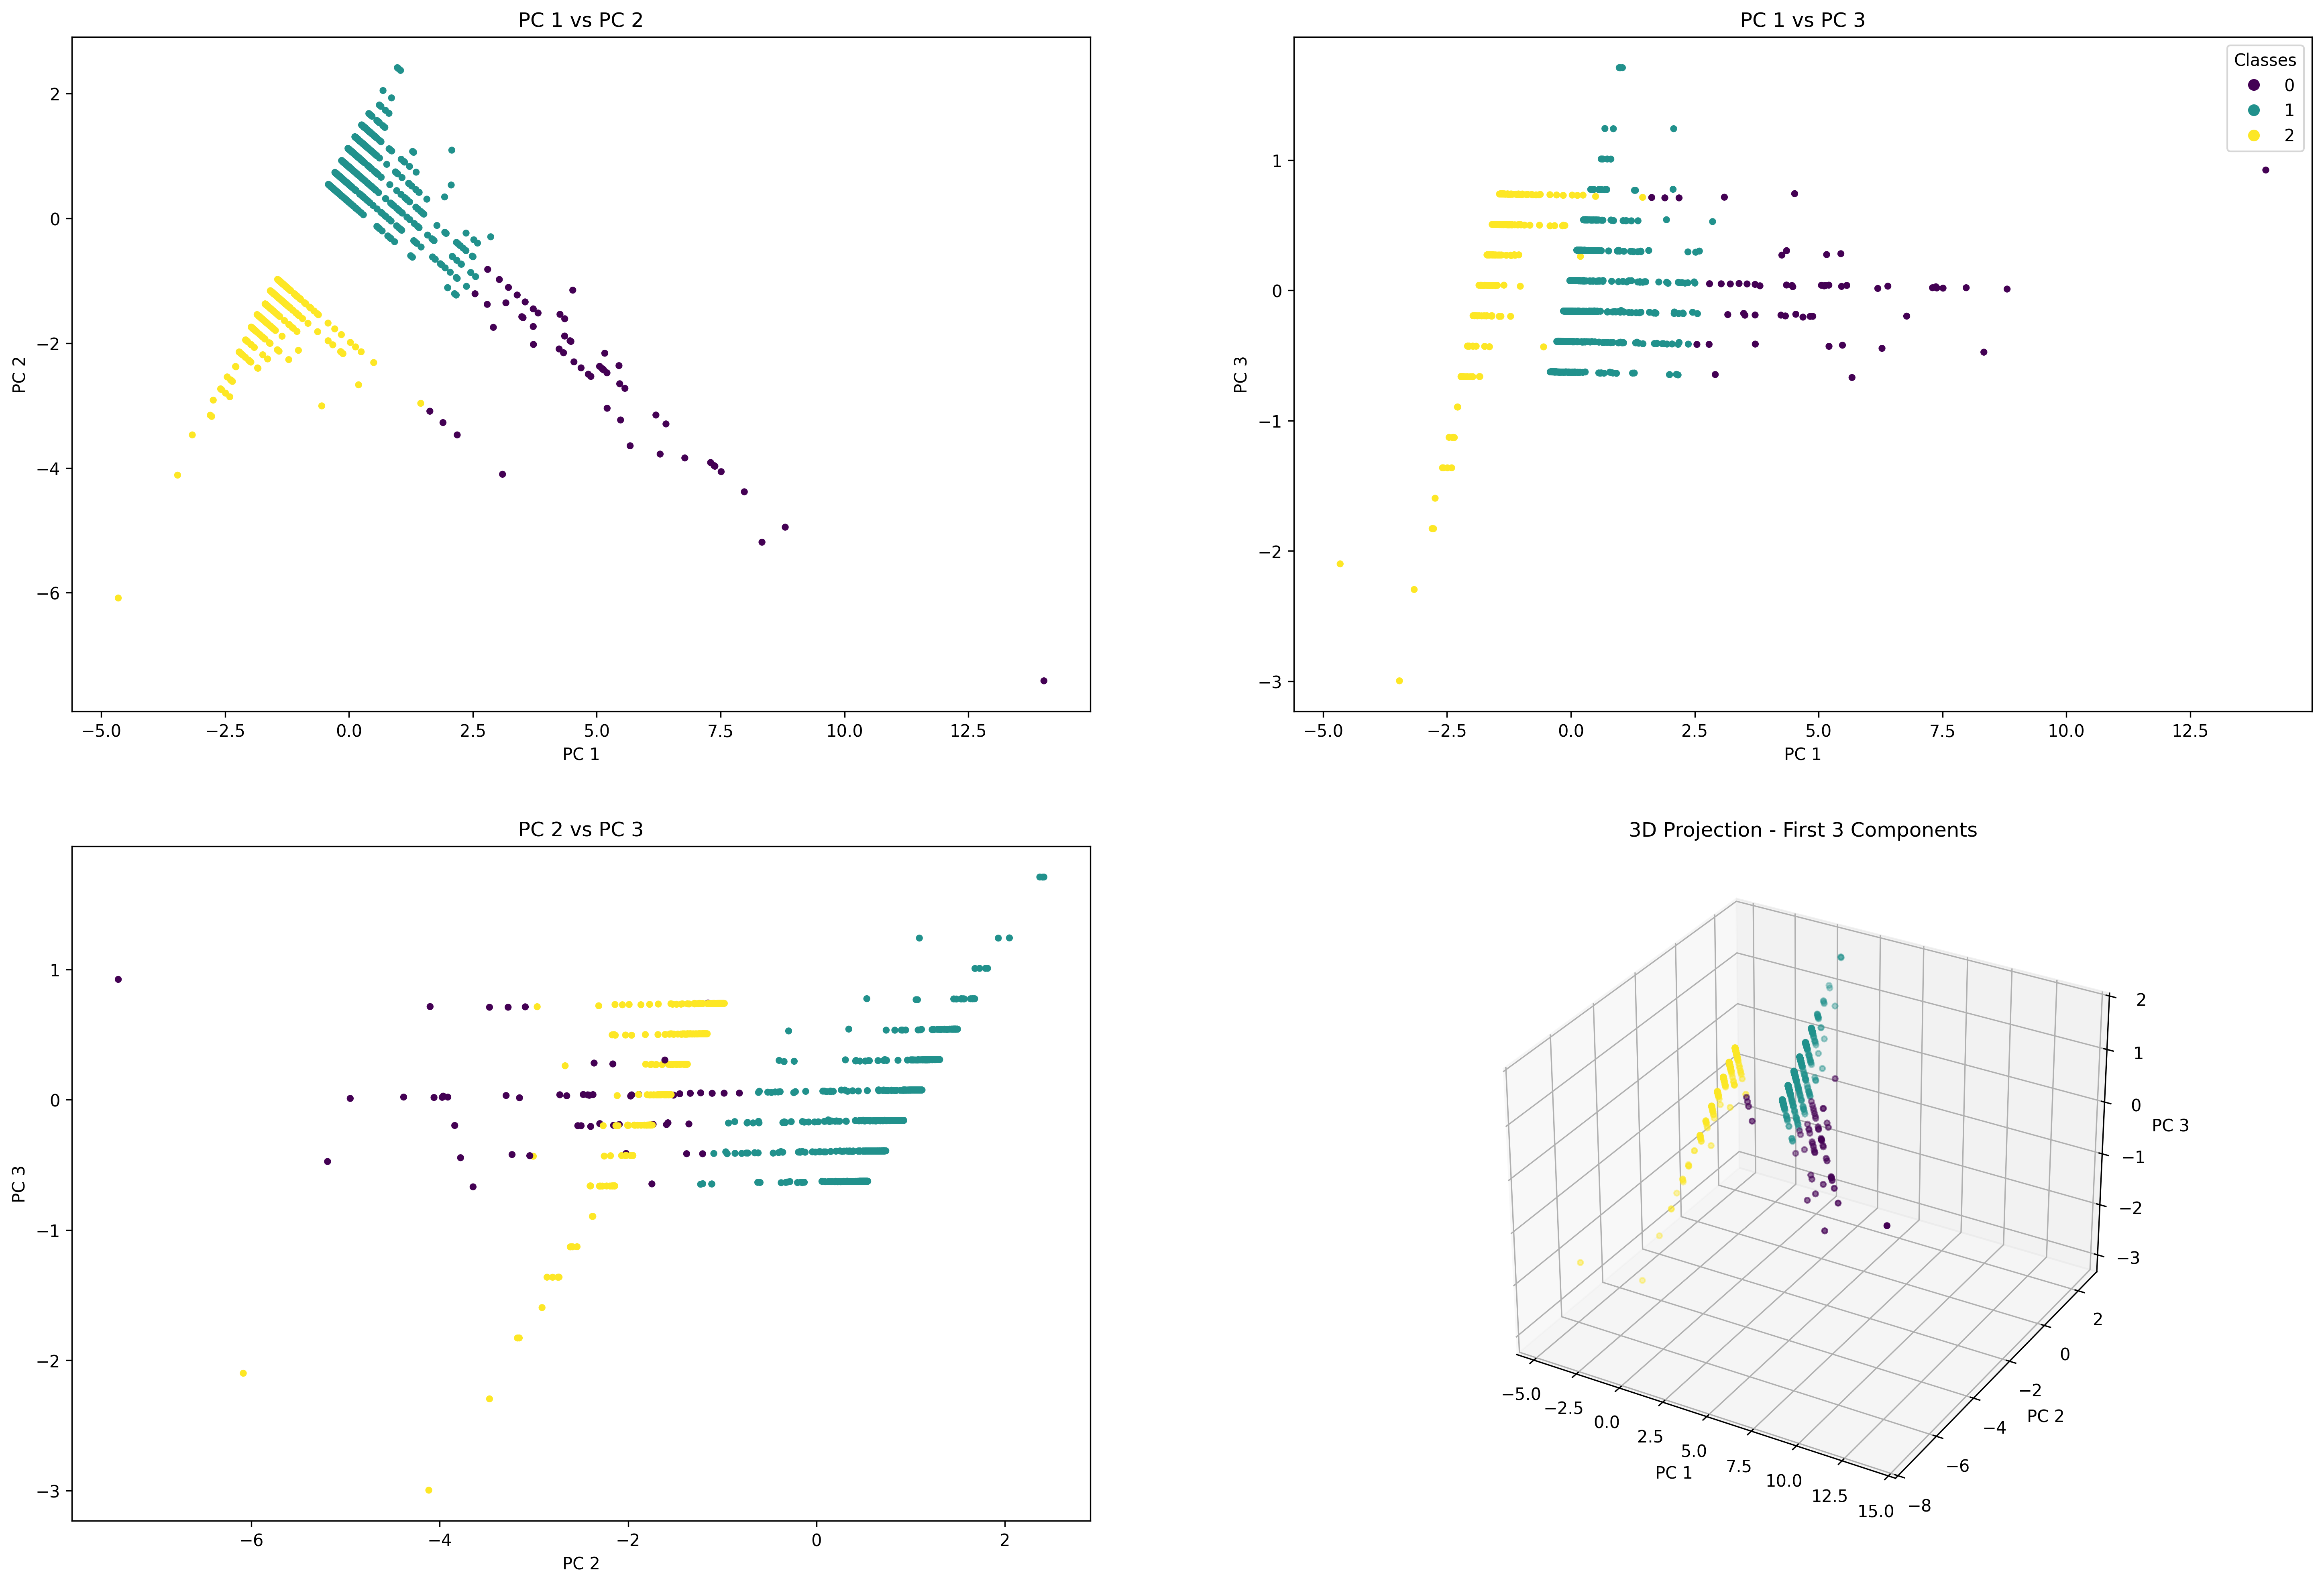

In [44]:
principal_components = pca.transform(X_train_scaled)

plt.figure(figsize=(24,16), dpi = 300)
# PC1 vs PC2
plt.subplot(2,2,1)
plt.scatter(principal_components[:,0], principal_components[:,1], c = y_labels, cmap='viridis', s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 1 vs PC 2')

# PC1 vs PC3
plt.subplot(2,2,2)
scatter2 = plt.scatter(principal_components[:,0], principal_components[:,2], c = y_labels, cmap='viridis', s=10)
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.title('PC 1 vs PC 3')
plt.legend(*scatter2.legend_elements(), title="Classes")

# PC2 vs PC3
plt.subplot(2,2,3)
plt.scatter(principal_components[:,1], principal_components[:,2], c = y_labels, cmap='viridis', s=10)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title('PC 2 vs PC 3')

ax = plt.subplot(2, 2, 4, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c = y_labels, cmap='viridis', s=10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D Projection - First 3 Components')

plt.show()

plt.show()

In [45]:
final_km = KMeans(n_clusters=3, random_state=42)
final_labels_pca = final_km.fit_predict(x_train_pca)
davies_bouldin_pca = davies_bouldin_score(x_train_pca, final_labels_pca)
print(f"Davies-Bouldin Index With PCA: {davies_bouldin_pca:.3f}")
calin_pca = calinski_harabasz_score(x_train_pca, final_labels_pca)
print(f"Calinski-Harabasz Index With PCA: {calin_pca:.3f}")


Davies-Bouldin Index With PCA: 0.488
Calinski-Harabasz Index With PCA: 1790.787
